In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
reviews_data = pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv')

In [3]:
reviews_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
# Dropping columns which we won't need for predictions
reviews_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
reviews_data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
# Fill NA values in Title and Review Text with space

reviews_data['Title'] = reviews_data['Title'].fillna('')
reviews_data['Review Text'] = reviews_data['Review Text'].fillna('')

In [7]:
# Fill NA values in Division Name, Department Name and Class Name with mode

from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

reviews_data[['Division Name','Department Name','Class Name']] = impute.fit_transform(reviews_data[['Division Name','Department Name','Class Name']])

In [8]:
reviews_data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [9]:
# Create New Variables
# Word Length
reviews_data["Word Count"] = reviews_data['Review Text'].str.split().apply(len)

# Character Length
reviews_data["Character Count"] = reviews_data['Review Text'].apply(len)

# Boolean for Positive and Negative Reviews, threshold set at 3
reviews_data["Label"] = 0
reviews_data.loc[reviews_data.Rating >= 3,["Label"]] = 1

In [10]:
reviews_data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count,Label
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,53,1
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,303,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,500,1
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,124,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,192,1


In [11]:
reviews_data.describe().T.drop("count",axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,918.118709,203.298980,0.0,861.0,936.0,1078.0,1205.0
Age,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
Rating,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.535936,5.702202,0.0,0.0,1.0,3.0,122.0
Word Count,58.030869,30.176433,0.0,34.0,57.0,87.0,115.0
Character Count,297.581666,152.572686,0.0,173.0,292.0,451.0,508.0
Label,0.897513,0.303294,0.0,1.0,1.0,1.0,1.0


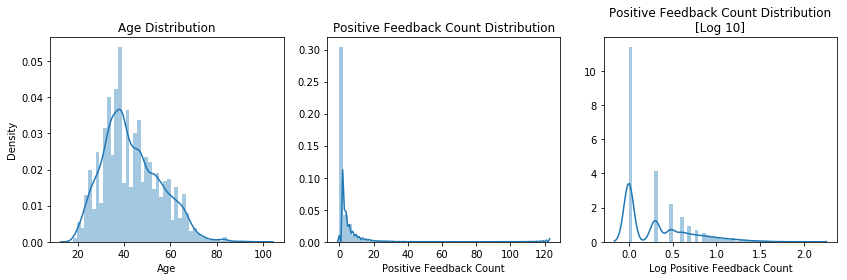

In [12]:
# Continous Distributions

fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
sns.distplot(reviews_data.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")

sns.distplot(reviews_data["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")

sns.distplot(np.log10((reviews_data["Positive Feedback Count"][reviews_data["Positive Feedback Count"].notnull()]+1)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")

plt.tight_layout()
plt.show()

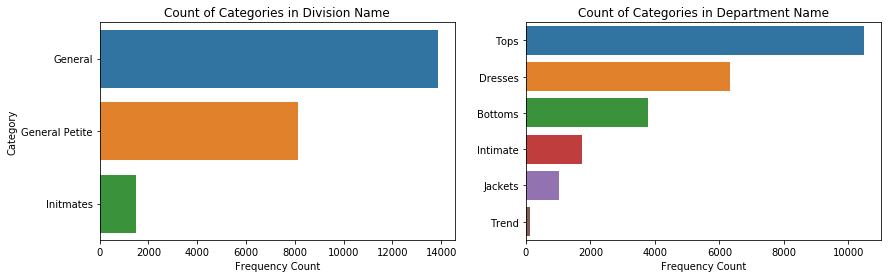

In [13]:
# Division Name and Department Name Distribution

row_plots = ["Division Name","Department Name"]
fig, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=reviews_data,order=reviews_data[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
    
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

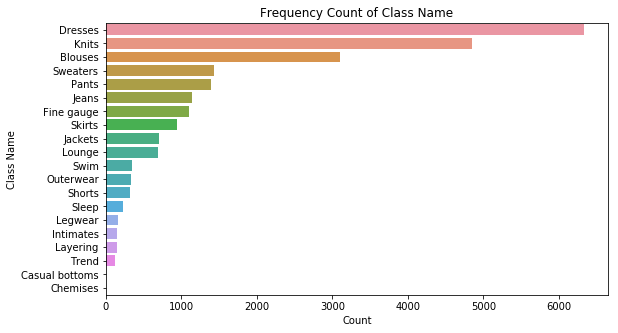

In [14]:
# Distribution of Class Name

plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=reviews_data,order=reviews_data["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

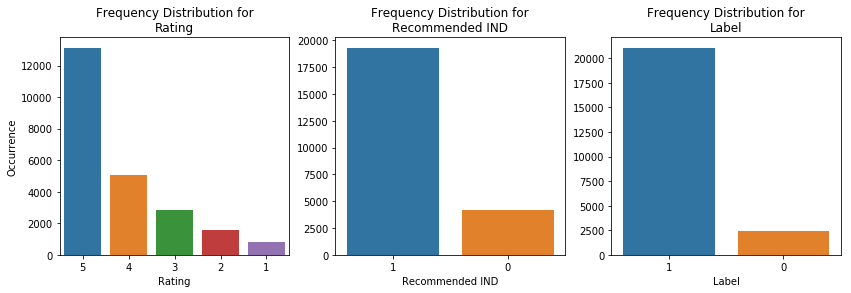

In [15]:
# Distribution of Rating, Recommended IND, and Label

cat_dtypes = ["Rating","Recommended IND","Label"]
increment = 0
fig, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=reviews_data,order=reviews_data[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurrence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
    
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()

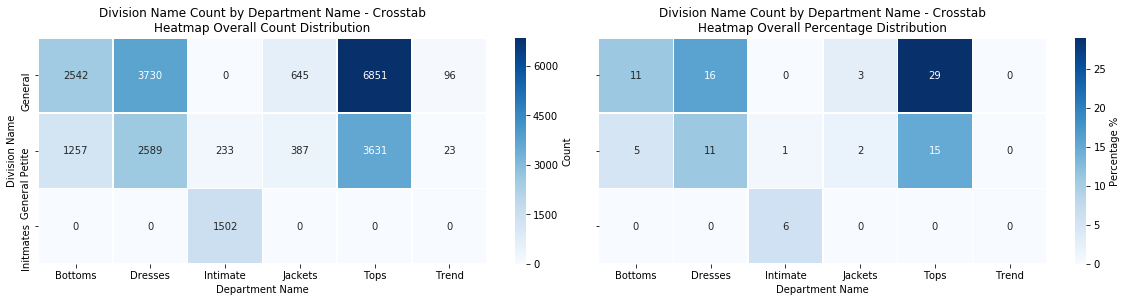

In [16]:
# Heatmaps of Division Name by Department Name

fig, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(reviews_data['Division Name'], reviews_data["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(reviews_data['Division Name'], reviews_data["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

In [17]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stop_words = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stop_words, size=size):

    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

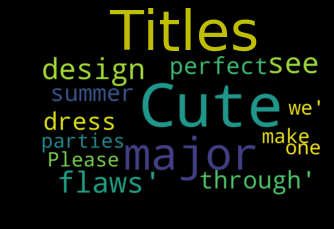

In [18]:
# Word Cloud for Titles
cloud(text= reviews_data.Title.astype(str).values,
      title="Titles",
      stopwords= stop_words,
      size = (4,4))

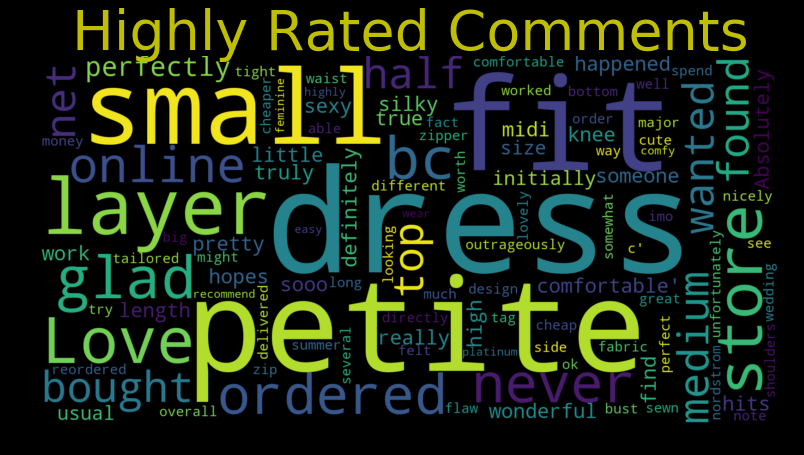

In [19]:
# Word for Highly Rated Comments

title ="Highly Rated Comments"
temp = reviews_data['Review Text'][reviews_data.Rating.astype(int) >= 3]
cloud(text= temp.values, title=title,stopwords= stop_words)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [21]:
# Processing text data
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

ps = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.lower() #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    words = [ps.stem(w) for w in words] #4
    return words

In [22]:
reviews = reviews_data['Review Text'].tolist()

In [23]:
reviews = [preprocessing(rev) for rev in reviews]

In [24]:
reviews = [' '.join(rev) for rev in reviews]

In [25]:
reviews_data['Review Text'] = reviews

In [26]:
tfidf = TfidfVectorizer(stop_words='english')

In [27]:
vector = tfidf.fit_transform(reviews_data['Review Text'])

In [28]:
vector

<23486x9636 sparse matrix of type '<class 'numpy.float64'>'
	with 509907 stored elements in Compressed Sparse Row format>

In [29]:
X = vector.toarray()
X.shape

(23486, 9636)

In [30]:
y = reviews_data['Label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [57]:
# Logistic Regression
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:01.130027


In [58]:
# Naive Bayes

start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.887352


In [59]:
y_pred_lr = lr.predict(X_test)

In [60]:
y_pred_nb = nb.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

In [61]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.73      0.24      0.36       502
           1       0.92      0.99      0.95      4196

    accuracy                           0.91      4698
   macro avg       0.82      0.61      0.65      4698
weighted avg       0.90      0.91      0.89      4698



In [62]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       502
           1       0.89      1.00      0.94      4196

    accuracy                           0.89      4698
   macro avg       0.95      0.50      0.48      4698
weighted avg       0.91      0.89      0.84      4698



In [63]:
y_pred_proba_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

y_pred_proba_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

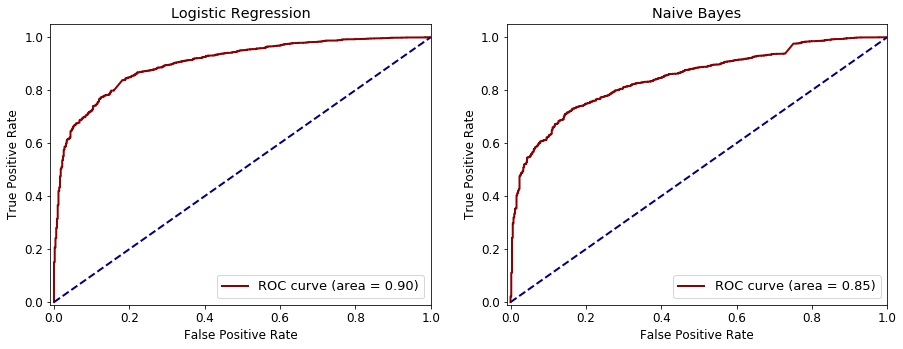

In [69]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
axes[0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0].legend(loc='lower right', fontsize=13)

axes[1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[1].legend(loc='lower right', fontsize=13)